In [3]:
# 1.	Import the necessary libraries (numpy, pandas, matplotlib and seaborn)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
# 2.	Import the Titanic dataset available at https://www.kaggle.com/c/titanic/data (it is train.csv that you want)
titanic = pd.read_csv("train.csv") #in the folder datasets located in the same folder as the python .ipynb 

In [8]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

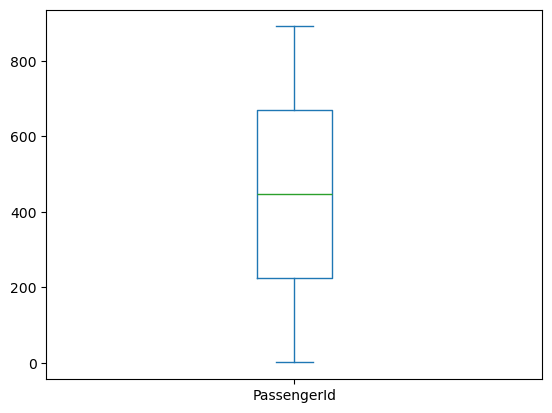

In [10]:
# 3.	Produce some box plots for numeric values in the dataset: outliers, min, 25%,50% - median, 75%, max, outliers
titanic.PassengerId.plot(kind='box')
#titanic.PassengerId.plot(kind='box', grid='True')
plt.show()

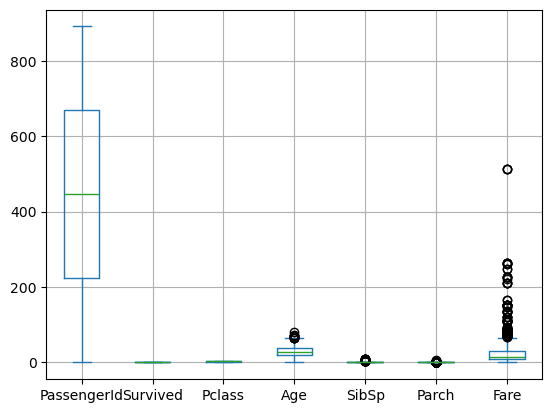

In [12]:
# 3.	Produce some box plots for numeric values in the dataset: outliers, min, 25%,50% - median, 75%, max, outliers
titanic.plot(kind='box', grid='True')
plt.show()

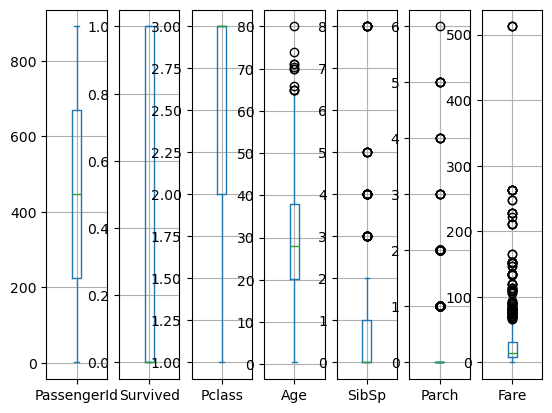

In [18]:
# 3.	Produce some box plots for numeric values in the dataset: outliers, min, 25%,50% - median, 75%, max, outliers
titanic.plot(kind='box', subplots=True, grid='True')
#titanic.plot(kind='box', subplots=True, layout=(3,3), grid='True', figsize=(15, 10))
plt.show()

In [20]:
titanic.Age.value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

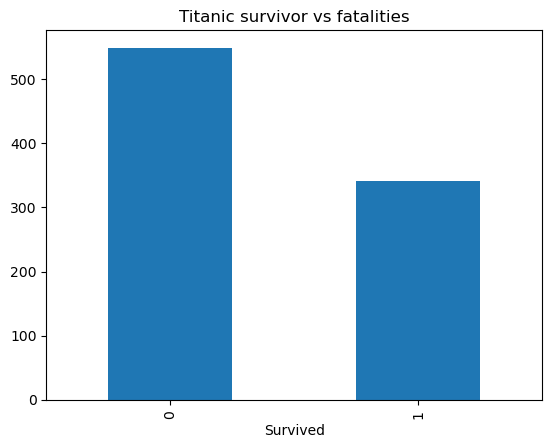

In [22]:
# 4.	Plot a bar chart showing the number of survivors and fatalities. Include a title on the chart. 0 and 1??
#titanic['Survived'].value_counts().plot(kind='bar', title="Titanic survivor vs fatalities")
titanic['Survived'].value_counts().plot.bar()
plt.title('Titanic survivor vs fatalities')
plt.show()

In [26]:
# Replace Values in DataFrame
titanic['Survived'] = titanic['Survived'].replace([0,1],['No','Yes'])
#titanic['Survived'] = titanic['Survived'].replace(['No','Yes'],[0,1])

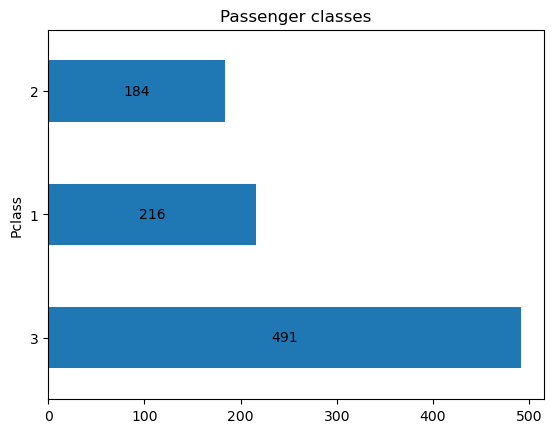

In [28]:
# 5.	Produce a horizontal bar chart showing all passenger classes, ordered with smallest number at top and largest at bottom
testChart = titanic['Pclass'].value_counts().sort_values(ascending=False).plot.barh()
# .patches is everything inside of the chart, lines and rectangles and circles and stuff. In this case we only have rectangles!
for rect in testChart.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The width of the bar is also not pixels, it's the count. So we can use it as the label!
    label_text = width
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    testChart.text(label_x, label_y, label_text, ha='center', va='center')
plt.title('Passenger classes')
plt.show()

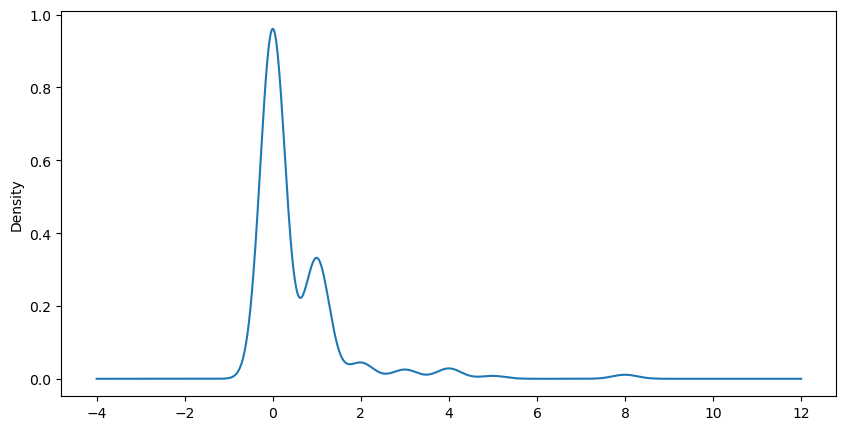

In [30]:
# 6.	Produce a density plot for number of siblings (SibSp)
# A Density Plot visualises the distribution of data over a continuous interval or time period. 
# It will allow for smoother distributions by smoothing out the noise. 
# The peaks of a Density Plot help display where values are concentrated over the interval.
# https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
titanic['SibSp'].plot.density(figsize=(10, 5))
plt.show()

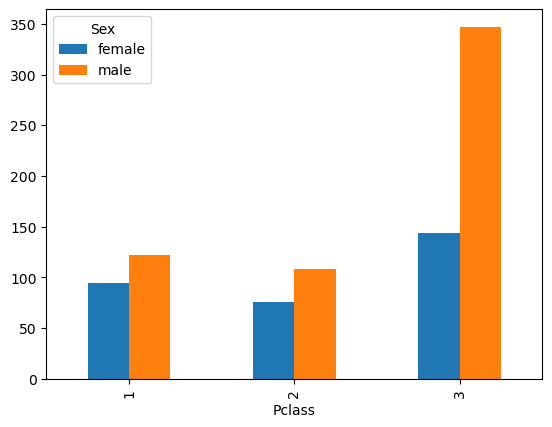

In [32]:
# 7.	Produce a stacked bar chart showing the number of each gender in each passenger class
titanic.groupby(['Pclass','Sex']).size().unstack().plot(kind='bar')
plt.show()

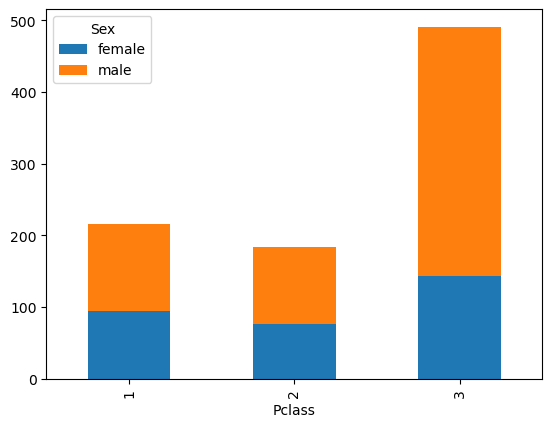

In [34]:
# 7.	Produce a stacked bar chart showing the number of each gender in each passenger class
titanic.groupby(['Pclass','Sex']).size().unstack().plot(kind='bar', stacked=True)
#plt.text(0,50,'94', ha='center', va='center')
plt.show()

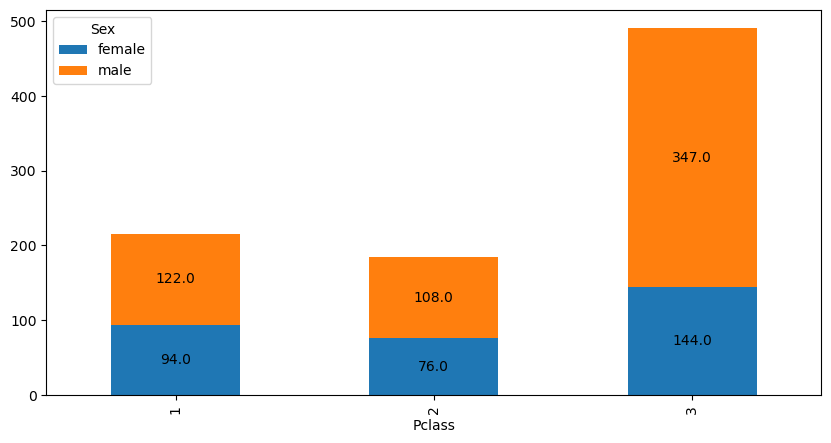

In [36]:
# Save the chart that's drawn
testChart = titanic.groupby(['Pclass','Sex']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 5))
# .patches is everything inside of the chart, lines and rectangles and circles and stuff. In this case we only have rectangles!
for rect in testChart.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The width of the bar is also not pixels, it's the count. So we can use it as the label!
    label_text = height
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    testChart.text(label_x, label_y, label_text, ha='center', va='center')
plt.show()

In [46]:
# 8.	Produce a heatmap showing the correlation between each numerical variable. What shows a strong correlation?

corr = titanic.corr()
sns.heatmap(corr)
plt.show()

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

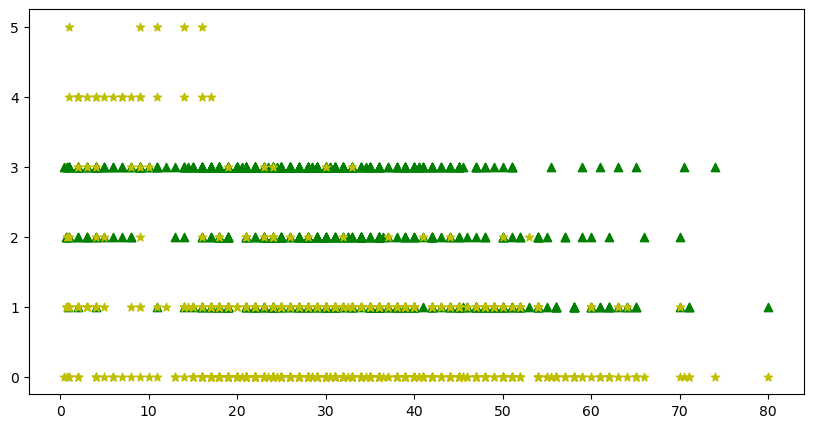

In [16]:
# 9.	Produce a single scatter plot showing age and passenger class as well as age and number of siblings, 
# different symbols should be used to represent the two different comparisons 
# filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(titanic["Age"], titanic["Pclass"], color='g', marker='^')
ax.scatter(titanic["Age"], titanic["SibSp"], color='y', marker = '*')
plt.show()